In [1]:
import numpy as np
import random
import itertools
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.io import wavfile
import glob, os
from librosa import effects
import speechpy

%matplotlib inline

In [2]:
def load_audio_file(file_path, fs, duration):
    duration_in_samples = fs * duration
    _, data = wavfile.read(file_path) #, sr=16000
    if len(data) > duration_in_samples:
        data = data[:duration_in_samples]
    else:
        data = np.pad(data, (0, max(0, duration_in_samples - len(data))), "constant")
    return data
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()
def load_wav_by_path(p, fs):
    _, wav = wavfile.read(p)
    if wav.size < fs:
        wav = np.pad(wav, (fs - wav.size, 0), mode='constant')
    else:
        wav = wav[0:fs]
    # wav = signal.resample(wav, 8000)
#     mean = np.mean(np.ravel(wav))
#     std = np.std(np.ravel(wav))
#     if std != 0:
#         wav = wav - mean
#         wav = wav / std
    return wav

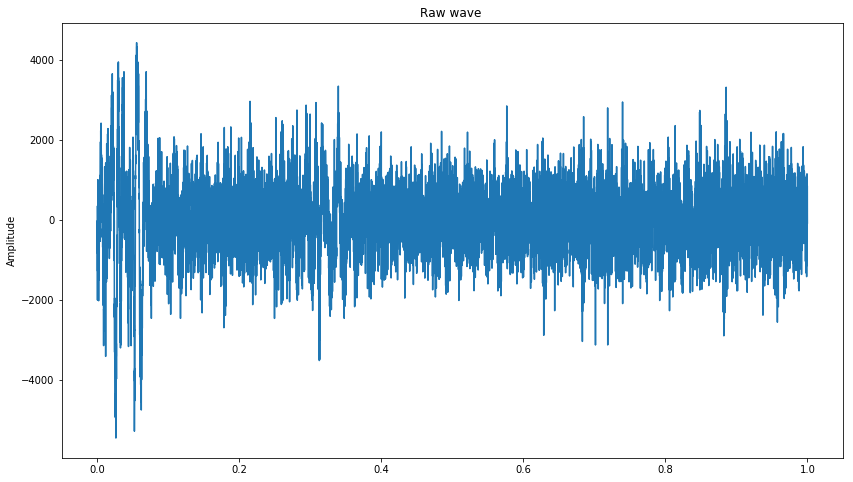

(98, 13)


In [24]:
fs = 16000
wav = load_wav_by_path("../input/test/audio/clip_8b0fd6b46.wav", fs)
wav = load_wav_by_path("../input/train/audio/silence/noise_550.wav", fs)

# plt.hist(wav)
# print(wav)
# wav = wav / np.max(wav)
# y_mod = wav / np.max(wav)

# y_mod = y_mod + np.roll(np.flip(y_mod, axis=0), int(fs*0.1))
# # wav_mod = effects.time_stretch(wav, 0.8)
# # wav_mod = wav_mod[-fs:]

plot_time_series(wav)
spec = speechpy.feature.lmfe(wav, sampling_frequency=fs, frame_length=0.030, frame_stride=0.01,
             num_filters=13, fft_length=256, low_frequency=0, high_frequency=8000)
print(spec.shape)
# fig = plt.figure(figsize=(14, 8))
# print(wav.shape)

# x = plt.imshow(spec)

# plot_time_series(wav_mod)
# x = plt.specgram(wav_mod, Fs=fs)
# print(len(wav_mod))

In [9]:
ipd.Audio(wav, rate=fs)

In [4]:
ipd.Audio(y_mod, rate=fs)

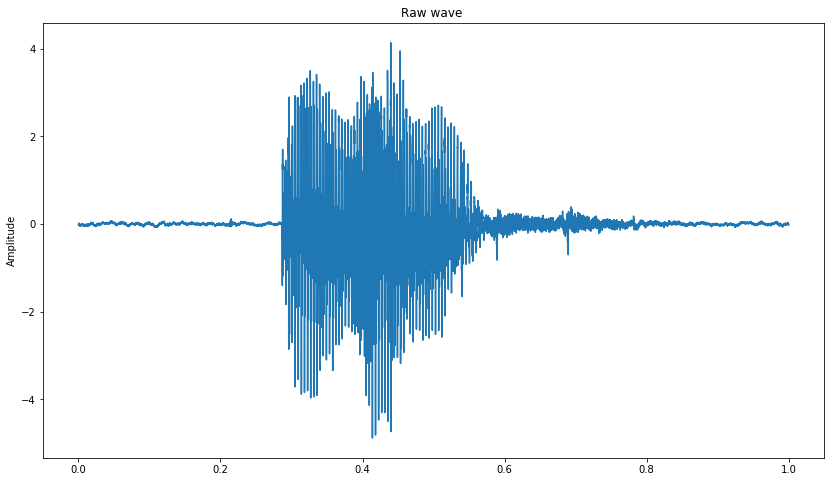

In [26]:
fs = 16000
wav = load_wav_by_path("../input/train/audio/off/1df483c0_nohash_0.wav", fs)
wav = 0.5*(wav + np.roll(wav, int(fs*0.1)))
plot_time_series(wav)
ipd.Audio(wav, rate=fs)

In [27]:
silence_test_wav = load_wav_by_path("../input/train/_background_noise_/white_noise.wav", fs)
silence_test_wav2 = load_wav_by_path("../input/submit_verify/silence/clip_52c989b4a.wav", fs)
x = plt.specgram(silence_test_wav[:fs], Fs=fs)
plot_time_series(silence_test_wav)
plot_time_series(silence_test_wav[:20])
print(silence_test_wav[:20])

x = plt.specgram(silence_test_wav2, Fs=fs)
plot_time_series(silence_test_wav2)
plot_time_series(silence_test_wav2[:20])
print(silence_test_wav2[:20])


FileNotFoundError: [Errno 2] No such file or directory: '../input/submit_verify/silence/clip_52c989b4a.wav'

In [ ]:
wav_flipped = np.flip(wav, axis=0)
plot_time_series(wav_flipped)
ipd.Audio(wav_flipped, rate=fs)

In [ ]:
background_noise_paths = glob.glob('../input/train/_background_noise_/*' + '.wav')
print(len(background_noise_paths))
for background_noise_path in background_noise_paths:
    background_noise_wav = load_wav_by_path(background_noise_path, fs)
    plot_time_series(background_noise_wav)

In [ ]:
unknown_path = glob.glob(os.path.join('..', 'input', 'train', 'audio', 'bed', '*wav'))
unknown_path = np.random.choice(unknown_path, 5)
unknown = load_wav_by_path(unknown_path[0], fs)
print(np.random.randint(0, fs, 1))
# unknown = np.roll(unknown, np.random.randint(0, fs, 1))
scale = np.random.uniform(0.5, 0.8, 1)
wav_with_unknown = (1 - scale) * wav + (unknown * scale)
plot_time_series(wav_with_unknown)
ipd.Audio(wav_with_unknown, rate=fs)

In [ ]:
shift_samples_num = int(((-1)**random.randrange(2)) * fs * random.uniform(0,0.3))
print(shift_samples_num)
wav_rolled = np.roll(wav, shift_samples_num)
ipd.Audio(wav_rolled, rate=fs)

In [ ]:
wav = load_wav_by_path("../input/train/audio/off/1df483c0_nohash_0.wav", fs)

length_change = np.random.uniform(low=0.7,high=1.3)
speed_fac = 1.0  / length_change
print(speed_fac)
tmp = np.interp(np.arange(0,len(wav),speed_fac),np.arange(0,len(wav)),wav)
#tmp = resample(y,int(length*lengt_fac))    # signal.resample is too slow
minlen = min( wav.shape[0], tmp.shape[0])     # keep same length as original;
wav_mod = wav
wav_mod *= 0                                    # pad with zeros
wav_mod[0:minlen] = tmp[0:minlen]

ipd.Audio(wav, rate=fs)


In [ ]:
silences_path = glob.glob(os.path.join('..', 'input', 'train', 'audio', 'silence', '*wav'))
silences_path = np.random.choice(silences_path, 5)
silence = load_wav_by_path(silences_path[0], fs)
plot_time_series(silence)
ipd.Audio(silence, rate=fs)

In [ ]:
scale = np.random.uniform(low=0, high=0.2, size=1)
data_noised = (1 - scale) * wav + (silence * scale)
plot_time_series(wav)
ipd.Audio(wav, rate=fs)

In [ ]:
speed_change = np.random.uniform(low=0.9,high=1.1)
print(speed_change)
tmp = librosa.effects.time_stretch(wav, speed_change)
minlen = min( wav.shape[0], tmp.shape[0])        # keep same length as original;
wav_speed = wav
wav_speed *= 0                                    # pad with zeros
wav_speed[0:minlen] = tmp[0:minlen]
plot_time_series(wav_speed)
ipd.Audio(wav_speed, rate=fs)

In [ ]:
bins_per_octave = 24        # pitch increments are quarter-steps
pitch_pm = 4                                # +/- this many quarter steps
pitch_change =  pitch_pm * 2*(np.random.uniform()-0.5)
wav = librosa.effects.pitch_shift(wav, fs, n_steps=pitch_change, bins_per_octave=bins_per_octave)
plot_time_series(wav)
ipd.Audio(wav, rate=fs)